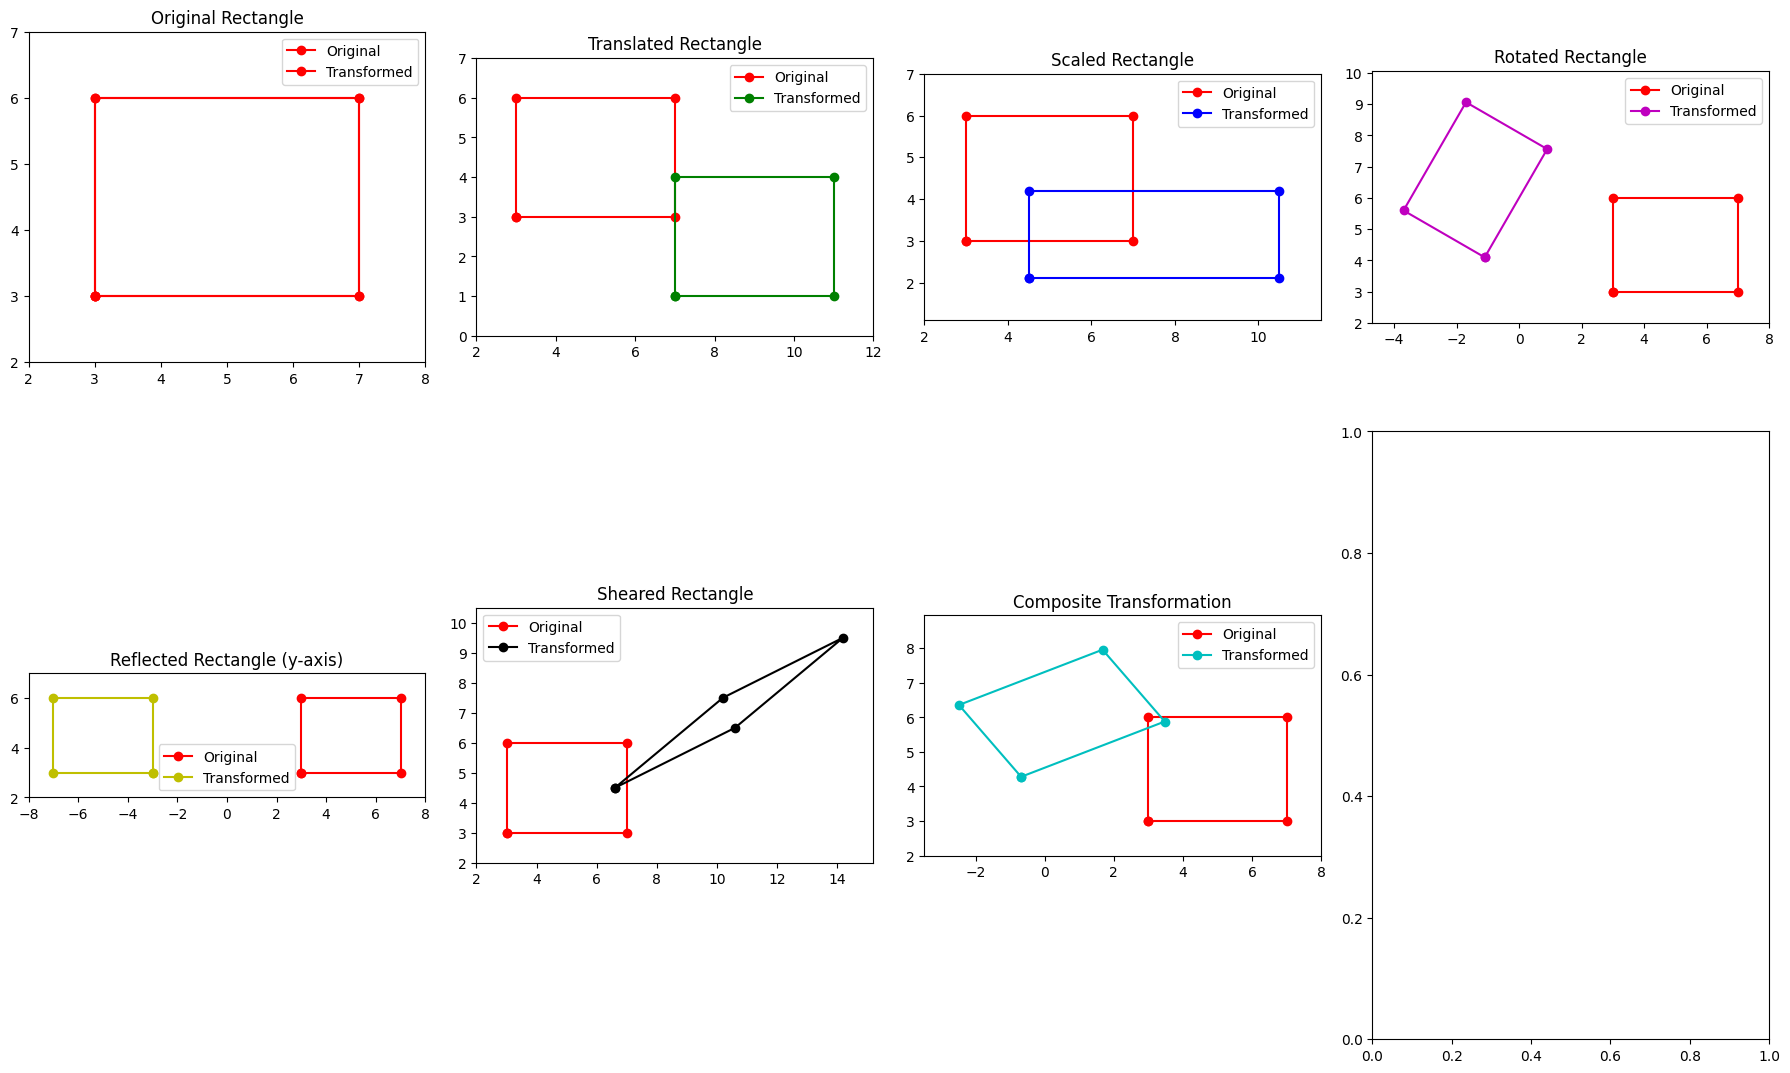

In [ ]:
#Anshika Gupta: E22CSEU0921: BATCH-31
import numpy as np
import matplotlib.pyplot as plt

# Define the original rectangle points
original_rectangle = np.array([[3, 3], [3, 6], [7, 6], [7, 3], [3, 3]])

def plot_shapes(original, transformed, ax, transform_style='bo-', original_style='ro-', title='Figure'):
    # Plot the original shape
    ax.plot(original[:, 0], original[:, 1], original_style, label='Original')
    # Plot the transformed shape
    ax.plot(transformed[:, 0], transformed[:, 1], transform_style, label='Transformed')
    ax.set_title(title)

    # Adjust aspect ratio using 'box' instead of 'datalim'
    ax.set_aspect('equal', adjustable='box')

    ax.legend()


    # Automatically adjust the axis limits with a buffer
    combined = np.vstack((original, transformed))
    buffer = 1  # Additional space around the shapes
    x_min, y_min = combined.min(axis=0) - buffer
    x_max, y_max = combined.max(axis=0) + buffer
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

def translate(shape, tx, ty):
    # Translation matrix
    T = np.array([[1, 0, tx],
                  [0, 1, ty],
                  [0, 0, 1]])
    # Apply the transformation
    return np.dot(T, np.vstack((shape.T, np.ones(shape.shape[0]))))[:2].T

def scale(shape, sx, sy):
    # Scaling matrix
    S = np.array([[sx, 0, 0],
                  [0, sy, 0],
                  [0, 0, 1]])
    # Apply the transformation
    return np.dot(S, np.vstack((shape.T, np.ones(shape.shape[0]))))[:2].T

def rotate(shape, theta):
    # Convert theta from degrees to radians
    theta = np.radians(theta)
    # Rotation matrix
    R = np.array([[np.cos(theta), -np.sin(theta), 0],
                  [np.sin(theta), np.cos(theta), 0],
                  [0, 0, 1]])
    # Apply the transformation
    return np.dot(R, np.vstack((shape.T, np.ones(shape.shape[0]))))[:2].T

def reflect(shape, axis):
    if axis == 'x':
        M = np.array([[1, 0, 0],
                      [0, -1, 0],
                      [0, 0, 1]])
    elif axis == 'y':
        M = np.array([[-1, 0, 0],
                      [0, 1, 0],
                      [0, 0, 1]])
    return np.dot(M, np.vstack((shape.T, np.ones(shape.shape[0]))))[:2].T

def shear(shape, shx, shy):
    # Shearing matrix
    Sh = np.array([[1, shx, 0],
                   [shy, 1, 0],
                   [0, 0, 1]])
    # Apply the transformation
    return np.dot(Sh, np.vstack((shape.T, np.ones(shape.shape[0]))))[:2].T

def composite_transform(shape):
    # Apply a combination of transformations (Order: Rotation → Scaling → Translation)
    R = rotate(shape, 30)
    S = scale(R, 1.2, 0.8)
    T = translate(S, -2, 1)
    return T

# Plotting
fig, ax = plt.subplots(2, 4, figsize=(18, 12))
ax = ax.ravel()

# Original Shape
plot_shapes(original_rectangle, original_rectangle, ax[0], original_style='ro-', transform_style='ro-', title='Original Rectangle')

# Translation
translated = translate(original_rectangle, 4, -2)
plot_shapes(original_rectangle, translated, ax[1], transform_style='go-', title='Translated Rectangle')

# Scaling
scaled = scale(original_rectangle, 1.5, 0.7)
plot_shapes(original_rectangle, scaled, ax[2], transform_style='bo-', title='Scaled Rectangle')

# Rotation
rotated = rotate(original_rectangle, 60)
plot_shapes(original_rectangle, rotated, ax[3], transform_style='mo-', title='Rotated Rectangle')

# Reflection
reflected = reflect(original_rectangle, 'y')
plot_shapes(original_rectangle, reflected, ax[4], transform_style='yo-', title='Reflected Rectangle (y-axis)')

# Shearing
sheared = shear(original_rectangle, 1.2, 0.5)
plot_shapes(original_rectangle, sheared, ax[5], transform_style='ko-', title='Sheared Rectangle')

# Composite Transformation
composite_result = composite_transform(original_rectangle)
plot_shapes(original_rectangle, composite_result, ax[6], transform_style='co-', title='Composite Transformation')

plt.tight_layout()
plt.show()


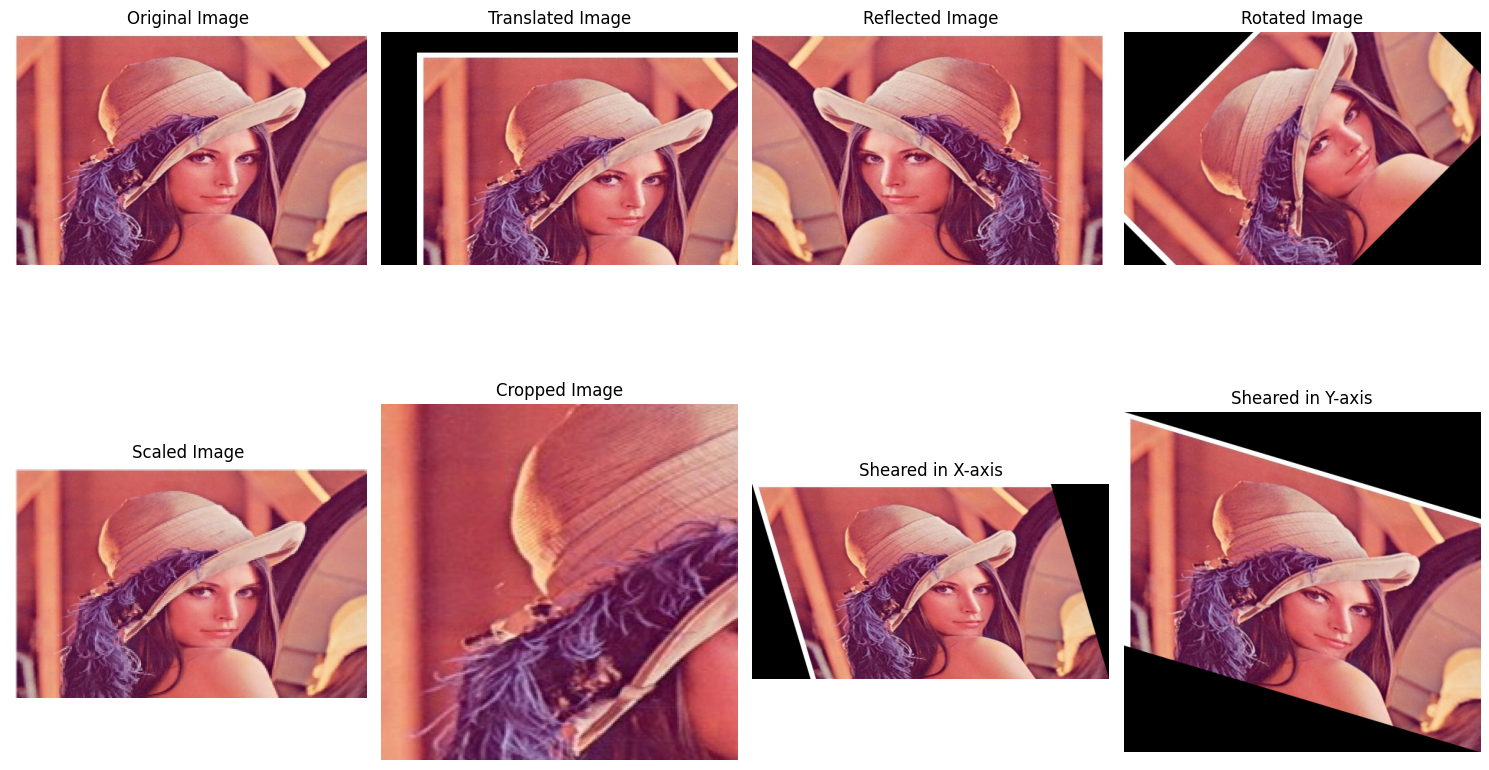

In [ ]:
#Anshika Gupta: E22CSEU0921: Batch-31
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'input.jpg'  # Replace with your image file path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

# Function to display images with labels
def display_images(images, titles, figsize=(15, 10)):
    n = len(images)
    plt.figure(figsize=figsize)
    for i in range(n):
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# 1. Image Translation
def translate_image(image, tx, ty):
    rows, cols = image.shape[:2]
    M = np.float32([[1, 0, tx], [0, 1, ty]])  # Translation matrix
    translated = cv2.warpAffine(image, M, (cols, rows))
    return translated

# 2. Image Reflection
def reflect_image(image, axis='x'):
    if axis == 'x':
        reflected = cv2.flip(image, 0)  # Flip vertically
    elif axis == 'y':
        reflected = cv2.flip(image, 1)  # Flip horizontally
    else:
        reflected = cv2.flip(image, -1)  # Flip both axes
    return reflected

# 3. Image Rotation
def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    center = (cols // 2, rows // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1)  # Rotation matrix
    rotated = cv2.warpAffine(image, M, (cols, rows))
    return rotated

# 4. Image Scaling
def scale_image(image, fx, fy):
    scaled = cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    return scaled

# 5. Image Cropping
def crop_image(image, x_start, y_start, width, height):
    cropped = image[y_start:y_start+height, x_start:x_start+width]
    return cropped

# 6. Shearing in x-axis
def shear_image_x(image, shx):
    rows, cols = image.shape[:2]
    M = np.float32([[1, shx, 0], [0, 1, 0]])
    sheared_x = cv2.warpAffine(image, M, (cols + int(shx * rows), rows))
    return sheared_x

# 7. Shearing in y-axis
def shear_image_y(image, shy):
    rows, cols = image.shape[:2]
    M = np.float32([[1, 0, 0], [shy, 1, 0]])
    sheared_y = cv2.warpAffine(image, M, (cols, rows + int(shy * cols)))
    return sheared_y

# Apply transformations
translated = translate_image(image, 50, 30)
reflected = reflect_image(image, axis='y')
rotated = rotate_image(image, 45)
scaled = scale_image(image, 0.5, 0.5)
cropped = crop_image(image, 50, 50, 200, 200)
sheared_x = shear_image_x(image, 0.3)
sheared_y = shear_image_y(image, 0.3)

# Display results with labels
titles = [
    'Original Image',
    'Translated Image',
    'Reflected Image',
    'Rotated Image',
    'Scaled Image',
    'Cropped Image',
    'Sheared in X-axis',
    'Sheared in Y-axis'
]

images = [
    image, translated, reflected, rotated,
    scaled, cropped, sheared_x, sheared_y
]

display_images(images, titles)


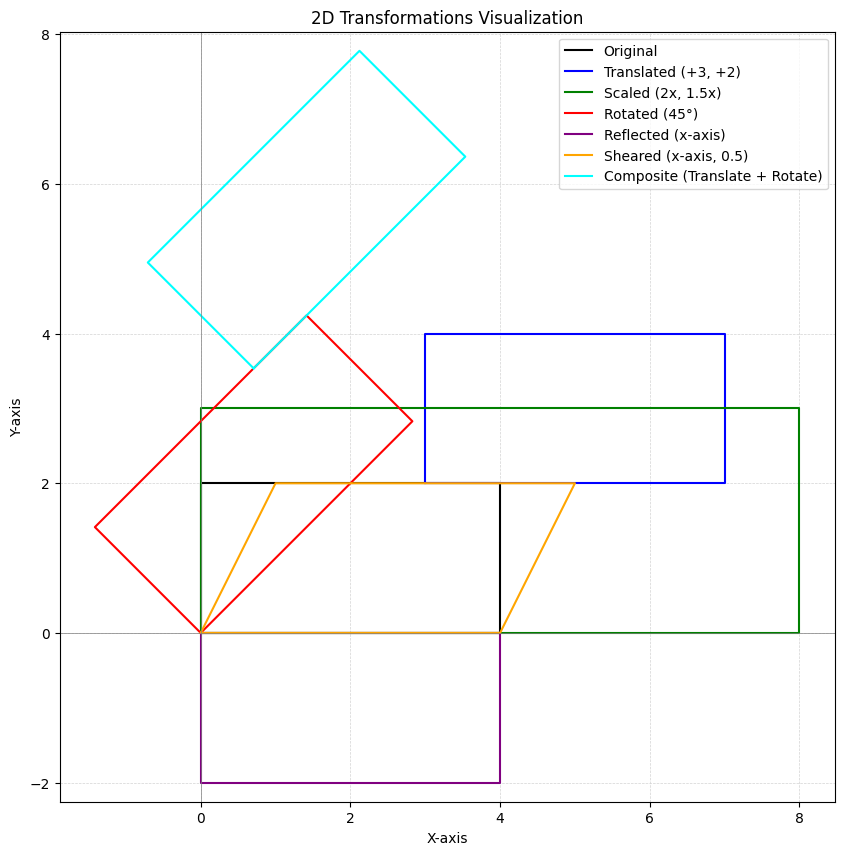

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_shape(vertices, color, label):
    """Plot a 2D shape based on its vertices."""
    vertices = np.append(vertices, [vertices[0]], axis=0)  # Close the shape
    plt.plot(vertices[:, 0], vertices[:, 1], color=color, label=label)

def translate(vertices, tx, ty):
    """Apply translation to a set of vertices."""
    translation_matrix = np.array([[1, 0, tx],
                                    [0, 1, ty],
                                    [0, 0, 1]])
    return apply_transformation(vertices, translation_matrix)

def scale(vertices, sx, sy):
    """Apply scaling to a set of vertices."""
    scaling_matrix = np.array([[sx, 0, 0],
                                [0, sy, 0],
                                [0, 0, 1]])
    return apply_transformation(vertices, scaling_matrix)

def rotate(vertices, angle):
    """Apply rotation to a set of vertices."""
    angle_rad = np.radians(angle)
    rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad), 0],
                                 [np.sin(angle_rad),  np.cos(angle_rad), 0],
                                 [0, 0, 1]])
    return apply_transformation(vertices, rotation_matrix)

def reflect(vertices, axis):
    """Apply reflection to a set of vertices."""
    if axis == 'x':  # Reflect across the x-axis
        reflection_matrix = np.array([[1, 0, 0],
                                       [0, -1, 0],
                                       [0, 0, 1]])
    elif axis == 'y':  # Reflect across the y-axis
        reflection_matrix = np.array([[-1, 0, 0],
                                       [0, 1, 0],
                                       [0, 0, 1]])
    elif axis == 'origin':  # Reflect across the origin
        reflection_matrix = np.array([[-1, 0, 0],
                                       [0, -1, 0],
                                       [0, 0, 1]])
    else:
        raise ValueError("Invalid axis for reflection. Use 'x', 'y', or 'origin'.")
    return apply_transformation(vertices, reflection_matrix)

def shear(vertices, shx, shy):
    """Apply shearing to a set of vertices."""
    shearing_matrix = np.array([[1, shx, 0],
                                 [shy, 1, 0],
                                 [0, 0, 1]])
    return apply_transformation(vertices, shearing_matrix)

def apply_transformation(vertices, matrix):
    """Apply a transformation matrix to a set of vertices."""
    homogeneous_vertices = np.hstack([vertices, np.ones((vertices.shape[0], 1))])
    transformed_vertices = homogeneous_vertices @ matrix.T
    return transformed_vertices[:, :2]

def main():
    # Define the original shape (a rectangle)
    original_vertices = np.array([[0, 0], [4, 0], [4, 2], [0, 2]])  # Rectangle

    # Create subplots for visualization
    plt.figure(figsize=(10, 10))

    # Plot original shape
    plot_shape(original_vertices, 'black', 'Original')

    # Apply transformations
    translated_vertices = translate(original_vertices, 3, 2)
    plot_shape(translated_vertices, 'blue', 'Translated (+3, +2)')

    scaled_vertices = scale(original_vertices, 2, 1.5)
    plot_shape(scaled_vertices, 'green', 'Scaled (2x, 1.5x)')

    rotated_vertices = rotate(original_vertices, 45)
    plot_shape(rotated_vertices, 'red', 'Rotated (45°)')

    reflected_vertices = reflect(original_vertices, 'x')
    plot_shape(reflected_vertices, 'purple', 'Reflected (x-axis)')

    sheared_vertices = shear(original_vertices, 0.5, 0)
    plot_shape(sheared_vertices, 'orange', 'Sheared (x-axis, 0.5)')

    # Composite Transformation: Translate, then Rotate
    composite_vertices = translate(original_vertices, 3, 2)
    composite_vertices = rotate(composite_vertices, 45)
    plot_shape(composite_vertices, 'cyan', 'Composite (Translate + Rotate)')

    # Set plot details
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.title('2D Transformations Visualization')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.axis('equal')
    plt.show()

if __name__ == "__main__":
    main()
